<a href="https://colab.research.google.com/github/syahla31/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laporan Praktikum Pertemuan 7 - Pengolahan Citra dan Visi Komputer**
---
Nama: Syahla' Syafiqah Fayra

NIM: 2141720015

# Praktikum Filter
---

## Membuat fungsi konvolusi

### Akses file yang terdapat pada drive

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

### Buatlah fungsi konvolusi.

Catatan: parameter yang digunakan boleh dimodifikasi.Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

**Konvolusi tanpa Library**
Fungsi konvolusi yang dibuat memiliki parameter berupa:

1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambahkan pada citra

  `def convolution2d(image, kernel, stride, padding):`

### Load citra yang akan diproses dan ubah menjadi citra keabuan

In [ ]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

### Tentukan kernel yang akan digunakan

contohnya kernel untuk filter sharpening sebagai berikut:

In [ ]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

### Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan

  `convolution2d(img_gray,kernel_sharpen,1,2)`

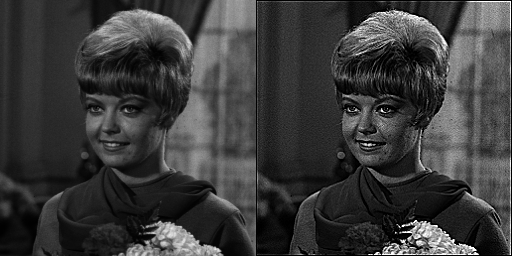

In [49]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow from Google Colab patches

def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Hitung dimensi dari matriks hasil
    output_height = (image_height - kernel_height + 2 * padding) // stride + 1
    output_width = (image_width - kernel_width + 2 * padding) // stride + 1

    output = np.zeros((output_height, output_width), dtype=np.float32)

    # Terapkan padding pada citra masukan
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Lakukan konvolusi
    for x in range(0, output_height):
        for y in range(0, output_width):
            # Tentukan region of interest (ROI) pada citra yang telah dipad
            row_start = x * stride
            row_end = row_start + kernel_height
            col_start = y * stride
            col_end = col_start + kernel_width

            # Ekstrak ROI dari citra yang telah dipad
            roi = padded_image[row_start:row_end, col_start:col_end]

            # Lakukan konvolusi dengan perkalian elemen dan penjumlahan
            convolution_result = np.sum(roi * kernel)

            output[x, y] = convolution_result

    return output

# Load the original image
img = cv2.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the kernel for image sharpening
kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

# Call the convolution function
result = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)

# Resize the result image to match the size of the original image
result = cv2.resize(result, (img_gray.shape[1], img_gray.shape[0]))

# Display the original and resized result images side by side
combined_img = np.hstack((img_gray, result))

# Show the combined image using cv2_imshow
cv2_imshow(combined_img)

### Buat Image Filter

untuk Average filter, low pass filter, high pass filter, dan beberapa filter

* Average Filter

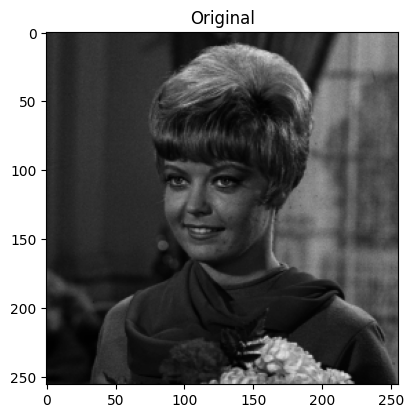

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Fungsi konvolusi 2D (seperti yang Anda berikan)
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Hitung dimensi dari matriks hasil
    output_height = (image_height - kernel_height + 2 * padding) // stride + 1
    output_width = (image_width - kernel_width + 2 * padding) // stride + 1

    output = np.zeros((output_height, output_width), dtype=np.float32)

    # Terapkan padding pada citra masukan
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Lakukan konvolusi
    for x in range(0, output_height):
        for y in range(0, output_width):
            # Tentukan region of interest (ROI) pada citra yang telah dipad
            row_start = x * stride
            row_end = row_start + kernel_height
            col_start = y * stride
            col_end = col_start + kernel_width

            # Ekstrak ROI dari citra yang telah dipad
            roi = padded_image[row_start:row_end, col_start:col_end]
            # Lakukan konvolusi dengan perkalian elemen dan penjumlahan
            convolution_result = np.sum(roi * kernel)

            output[x, y] = convolution_result

    return output


# Load citra masukan dan konversi ke grayscale
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Citra asli dan invers
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))

* Low Pass filter

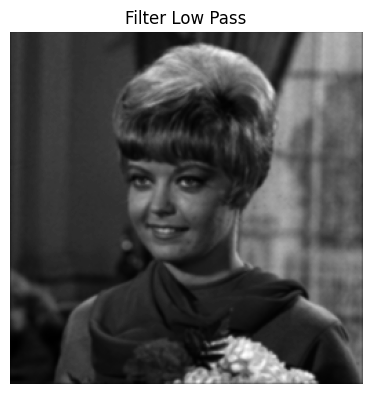

In [52]:
kernel_low_pass = np.array([[1, 1, 1],
                            [1, 4, 1],
                            [1, 1, 1]]) / 12.0
result_low_pass = convolution2d(img_gray, kernel_low_pass, stride=1, padding=1)

# Set the title for the image
title = "Filter Low Pass"

# Display the result with the title using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title(title)
plt.imshow(result_low_pass, cmap='gray')
plt.axis('off')

plt.show()

* High Pass Filter

         Filter High Pass


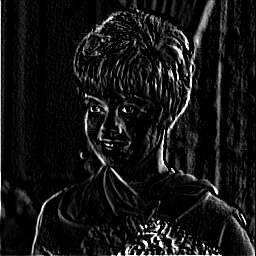

In [57]:
kernel_high_pass = np.array([[-1, 0, 1],
                             [-1, 0, 3],
                             [-3, 0, 1]])
result_high_pass = convolution2d(img_gray, kernel_high_pass, stride=1, padding=1)

print("         Filter High Pass")
cv2_imshow(result_high_pass)

**Beberapa filter**

1. Sharpen

         Filter Sharpen


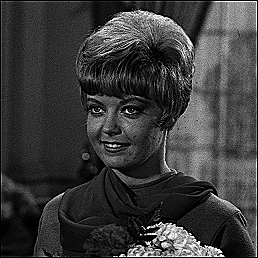

In [59]:
kernel_sharpen = np.array([ [0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
result_sharpen = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)
print("         Filter Sharpen")
cv2_imshow(result_sharpen)  # Hasil filter sharpen

2. Emboss

          Filter Emboss


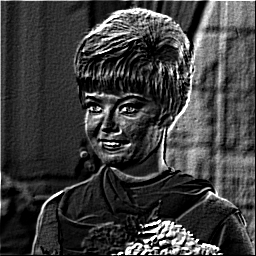

In [ ]:
kernel_emboss = np.array([ [-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
result_emboss = convolution2d(img_gray, kernel_emboss, stride=1, padding=1)
print("          Filter Emboss")
cv2_imshow(result_emboss)  # Hasil filter emboss

3. Left Sobel Edge Detection

    Left Sobel Edge Detection


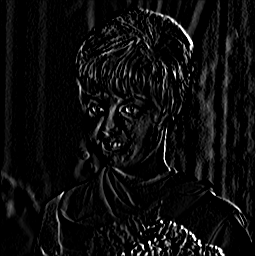

In [ ]:
kernel_sobel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])
result_sobel = convolution2d(img_gray, kernel_sobel, stride=1, padding=1)
print("    Left Sobel Edge Detection")
cv2_imshow(result_sobel)  # Hasil filter Sobel

4. Canny Edge Detection

    Filter Canny Edge Detection


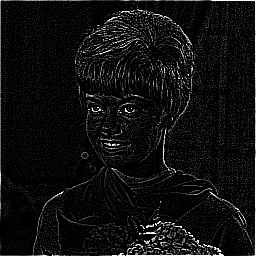

In [ ]:
kernel_canny = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]])
result_canny = convolution2d(img_gray, kernel_canny, stride=1, padding=1)
print("    Filter Canny Edge Detection")
cv2_imshow(result_canny)  # Hasil filter Canny

5. Prewitt Edge Detection

  Filter Prewitt Edge Detection


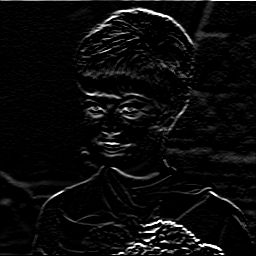

In [ ]:
kernel_prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
result_prewitt = convolution2d(img_gray, kernel_prewitt, stride=1, padding=1)
print("  Filter Prewitt Edge Detection")
cv2_imshow(result_prewitt)  # Hasil filter Prewitt

6. 5x5 Gaussian Blur

        5x5 Gaussian Blur


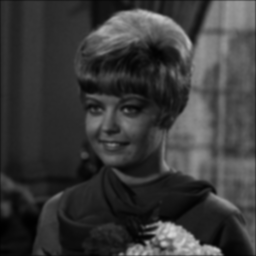

In [ ]:
kernel_gaussian_5x5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]]) / 256.0
result_gaussian_5x5 = convolution2d(img_gray, kernel_gaussian_5x5, stride=1, padding=2)
print("        5x5 Gaussian Blur")
cv2_imshow(result_gaussian_5x5)  # Hasil filter Gaussian 5x5

7. 21x21 Gaussian Blur

       21x21 Gaussian Blur


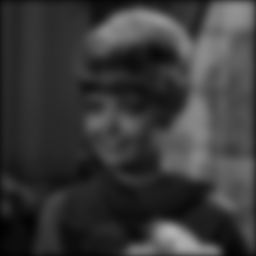

In [ ]:
import math
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
result_gaussian_21x21 = convolution2d(img_gray, gauss_kernel, stride=1, padding=10)
print("       21x21 Gaussian Blur")
cv2_imshow(result_gaussian_21x21)  # Hasil filter Gaussian 21x21

# Tugas
---

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP

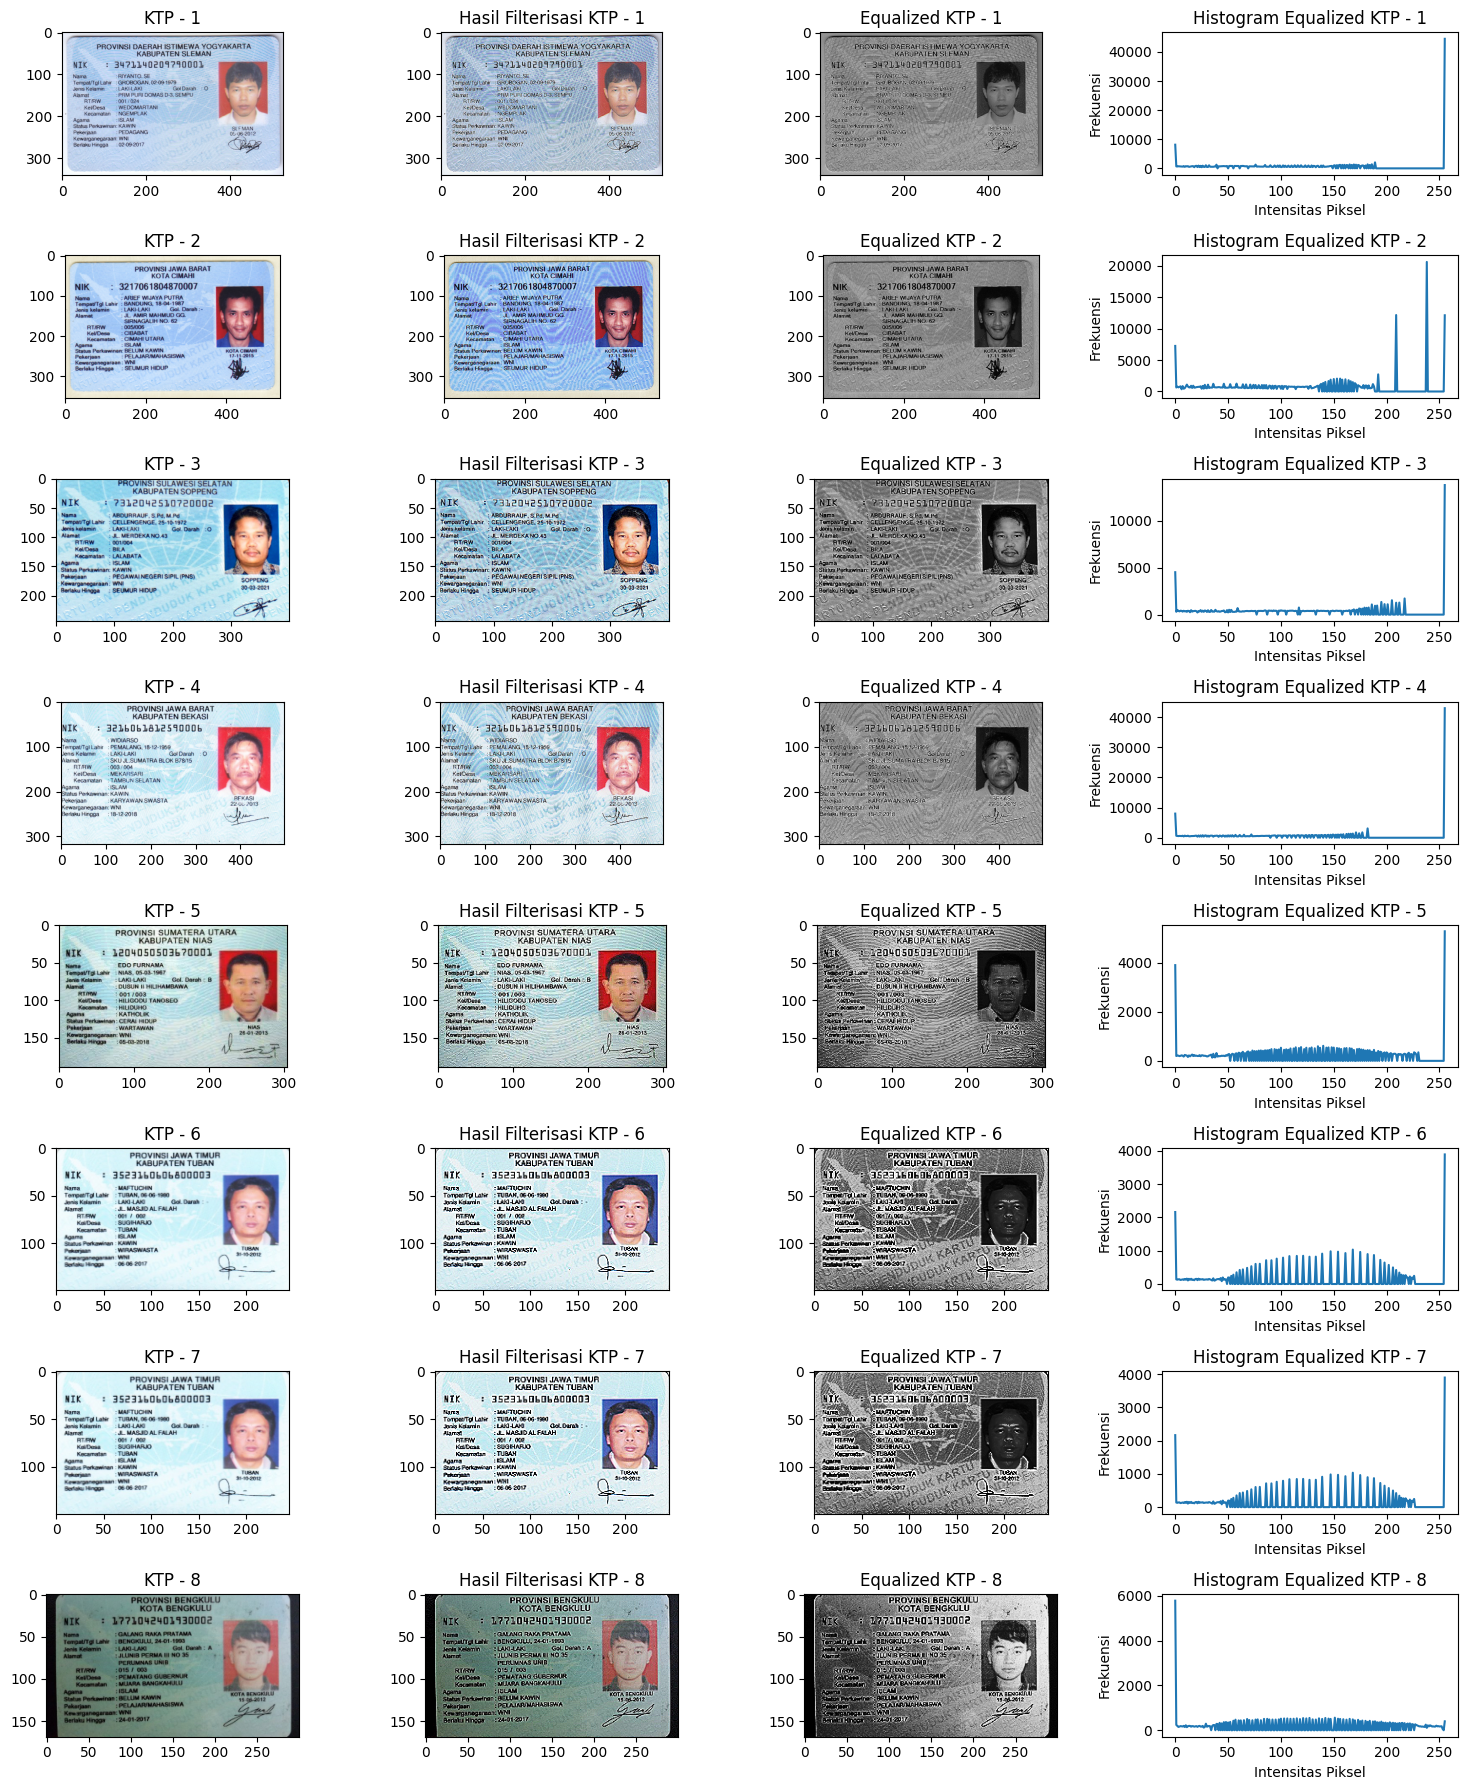

In [35]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Images/KTP_More/'

ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

def Brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)
    ktp_image_resized = cv2.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)
    brightness_adjusted = Brightness(ktp_image_resized, -10)
    result = cv2.filter2D(brightness_adjusted, -1, kernel_sharpen)

    result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_equalized = cv2.equalizeHist(result_gray)
    result_equalized_color = cv2.cvtColor(result_equalized, cv2.COLOR_GRAY2BGR)

    axs[i, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP - {i+1}')

    axs[i, 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB,))
    axs[i, 1].set_title(f'Hasil Filterisasi KTP - {i+1}')

    axs[i, 2].imshow(cv2.cvtColor(result_equalized_color, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized KTP - {i+1}')

    hist_equalized = cv2.calcHist([result_equalized], [0], None, [256], [0, 256])

    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized KTP - {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()